In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


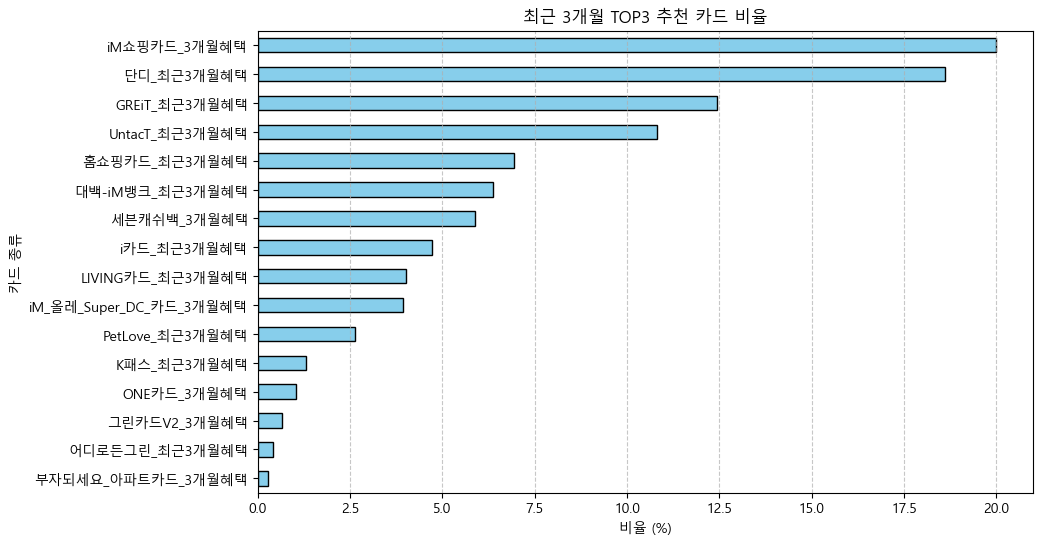

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re  # 정규표현식 사용

# 데이터 불러오기 (예제: CSV 파일이 있다고 가정)
df = pd.read_csv("고객혜택금액_sample1_final_ver5.csv")  # 실제 데이터 파일명으로 변경할 것

# 제외할 컬럼 리스트 (스카이실버, 스카이골드)
exclude_cards = ["스카이실버_1개월혜택", "스카이실버_3개월혜택", "스카이실버_6개월혜택", "스카이실버_12개월혜택",
                 "스카이골드_1개월혜택", "스카이골드_3개월혜택", "스카이골드_6개월혜택", "스카이골드_12개월혜택"]

# 📌 사용자 입력: 분석할 기간 설정 (1, 3, 6, 12 중 선택)
n_months = 3
period_str = f"{n_months}개월혜택"

# 📌 `최근n개월혜택` 또는 `n개월혜택`이 포함된 컬럼을 필터링
selected_columns = [col for col in df.columns if (re.search(rf"(최근{n_months}개월혜택|{period_str})$", col) and col not in exclude_cards)]

# 고객별 TOP3 카드 찾기
top3_cards = df[["고객ID"] + selected_columns].set_index("고객ID")
top3_cards = top3_cards.apply(lambda row: row.nlargest(3).index.tolist(), axis=1)  # 각 행에서 상위 3개 컬럼 가져오기

# 리스트를 1차원으로 풀어 카드별 추천 횟수 세기
top3_flattened = [card for sublist in top3_cards for card in sublist]
card_counts = pd.Series(top3_flattened).value_counts()

# 카드별 추천 비율 계산
total_recommendations = len(top3_flattened)
card_ratios = (card_counts / total_recommendations) * 100  # 퍼센트 변환

# 수평 바 차트 그리기
plt.figure(figsize=(10, 6))
card_ratios.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("비율 (%)")
plt.ylabel("카드 종류")
plt.title(f"최근 {n_months}개월 TOP3 추천 카드 비율")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()


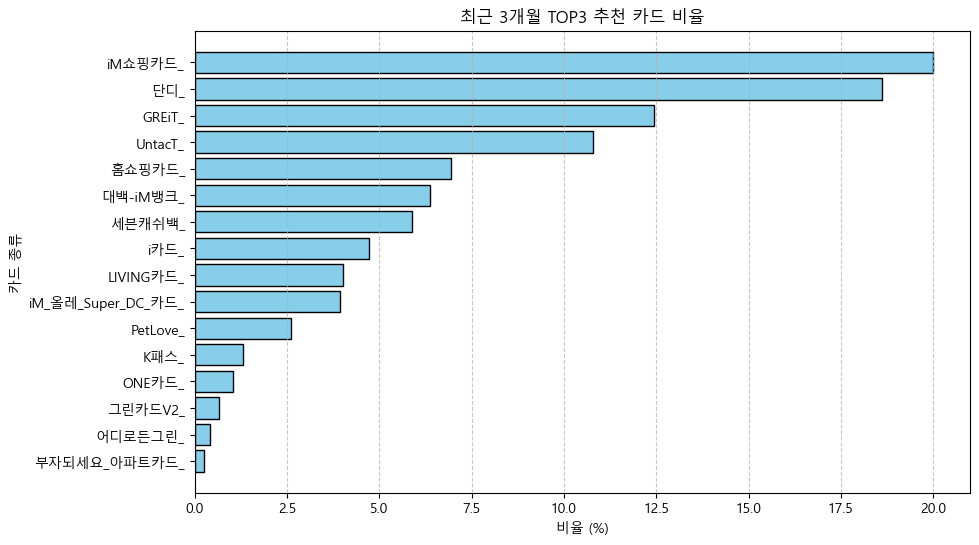

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re  # 정규표현식 사용

# 데이터 불러오기 (예제: CSV 파일이 있다고 가정)
df = pd.read_csv("고객혜택금액_sample1_final_ver5.csv")  # 실제 데이터 파일명으로 변경할 것

# 제외할 컬럼 리스트 (스카이실버, 스카이골드)
exclude_cards = ["스카이실버_1개월혜택", "스카이실버_3개월혜택", "스카이실버_6개월혜택", "스카이실버_12개월혜택",
                 "스카이골드_1개월혜택", "스카이골드_3개월혜택", "스카이골드_6개월혜택", "스카이골드_12개월혜택"]

# 📌 사용자 입력: 분석할 기간 설정 (1, 3, 6, 12 중 선택)
n_months = 3
period_str = f"{n_months}개월혜택"

# 📌 `최근n개월혜택` 또는 `n개월혜택`이 포함된 컬럼을 필터링
selected_columns = [col for col in df.columns if (re.search(rf"(최근{n_months}개월혜택|{period_str})$", col) and col not in exclude_cards)]

# 고객별 TOP3 카드 찾기
top3_cards = df[["고객ID"] + selected_columns].set_index("고객ID")
top3_cards = top3_cards.apply(lambda row: row.nlargest(3).index.tolist(), axis=1)  # 각 행에서 상위 3개 컬럼 가져오기

# 리스트를 1차원으로 풀어 카드별 추천 횟수 세기
top3_flattened = [card for sublist in top3_cards for card in sublist]
card_counts = pd.Series(top3_flattened).value_counts()

# 카드별 추천 비율 계산
total_recommendations = len(top3_flattened)
card_ratios = (card_counts / total_recommendations) * 100  # 퍼센트 변환

# 📌 y축에서 "최근3개월혜택" 또는 "3개월혜택" 텍스트 제거 (카드 이름만 남김)
card_labels = [re.sub(rf"(최근{n_months}개월혜택|{period_str})$", "", card) for card in card_ratios.index]

# 📌 카드 순서를 내림차순(추천 비율이 높은 순)으로 정렬
sorted_indices = card_ratios.sort_values(ascending=False).index  # 정렬된 인덱스
sorted_card_ratios = card_ratios[sorted_indices]  # 정렬된 비율
sorted_card_labels = [re.sub(rf"(최근{n_months}개월혜택|{period_str})$", "", card) for card in sorted_indices]  # 정렬된 카드명

# 📌 **y축 순서를 반대로 바꿔서 가장 많이 추천된 카드가 맨 위로 오도록 변경**
plt.figure(figsize=(10, 6))
plt.barh(sorted_card_labels[::-1], sorted_card_ratios[::-1], color="skyblue", edgecolor="black")  # 역순 출력
plt.xlabel("비율 (%)")
plt.ylabel("카드 종류")
plt.title(f"최근 {n_months}개월 TOP3 추천 카드 비율")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()


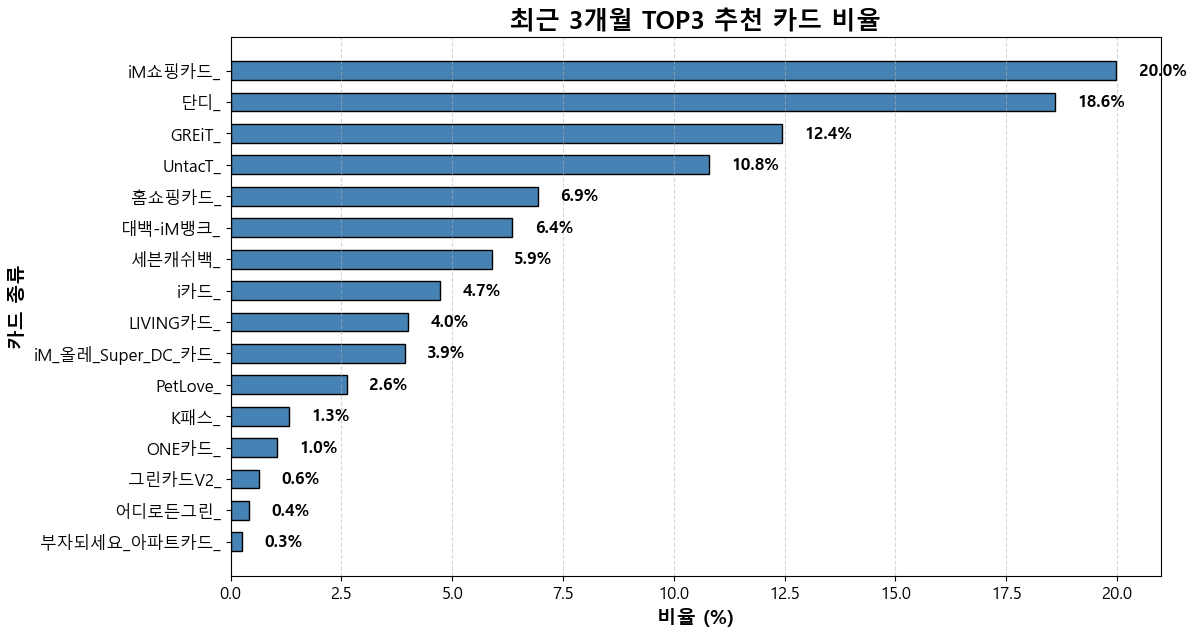

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 데이터 불러오기 (예제: CSV 파일이 있다고 가정)
df = pd.read_csv("고객혜택금액_sample1_final_ver5.csv")  # 실제 데이터 파일명으로 변경할 것

# 제외할 컬럼 리스트 (스카이실버, 스카이골드)
exclude_cards = ["스카이실버_1개월혜택", "스카이실버_3개월혜택", "스카이실버_6개월혜택", "스카이실버_12개월혜택",
                 "스카이골드_1개월혜택", "스카이골드_3개월혜택", "스카이골드_6개월혜택", "스카이골드_12개월혜택"]

# 사용자 입력: 분석할 기간 설정 (1, 3, 6, 12 중 선택)
n_months = 3
period_str = f"{n_months}개월혜택"

# `최근n개월혜택` 또는 `n개월혜택`이 포함된 컬럼을 필터링
selected_columns = [col for col in df.columns if (re.search(rf"(최근{n_months}개월혜택|{period_str})$", col) and col not in exclude_cards)]

# 고객별 TOP3 카드 찾기
top3_cards = df[["고객ID"] + selected_columns].set_index("고객ID")
top3_cards = top3_cards.apply(lambda row: row.nlargest(3).index.tolist(), axis=1)  # 각 행에서 상위 3개 컬럼 가져오기

# 리스트를 1차원으로 풀어 카드별 추천 횟수 세기
top3_flattened = [card for sublist in top3_cards for card in sublist]
card_counts = pd.Series(top3_flattened).value_counts()

# 카드별 추천 비율 계산
total_recommendations = len(top3_flattened)
card_ratios = (card_counts / total_recommendations) * 100  # 퍼센트 변환

# y축에서 "최근3개월혜택" 또는 "3개월혜택" 텍스트 제거 (카드 이름만 남김)
sorted_indices = card_ratios.sort_values(ascending=False).index  # 정렬된 인덱스
sorted_card_ratios = card_ratios[sorted_indices]  # 정렬된 비율
sorted_card_labels = [re.sub(rf"(최근{n_months}개월혜택|{period_str})$", "", card) for card in sorted_indices]  # 정렬된 카드명

# **📌 가독성 향상**
plt.figure(figsize=(12, 7))  # 슬라이드 크기에 맞게 조절
bars = plt.barh(sorted_card_labels[::-1], sorted_card_ratios[::-1], color="#4682B4", edgecolor="black", height=0.6)  # 더 깊은 블루 + 테두리 추가

# **폰트 크기 조정**
plt.xlabel("비율 (%)", fontsize=14, fontweight="bold")  # x축 폰트 크기 증가
plt.ylabel("카드 종류", fontsize=14, fontweight="bold")  # y축 폰트 크기 증가
plt.title(f"최근 {n_months}개월 TOP3 추천 카드 비율", fontsize=18, fontweight="bold")  # 제목 크기 증가

# **x축 눈금 포맷 조정 (소수점 1자리까지만 표시)**
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)  # x축 보조선 줄임

# **바 차트 숫자 라벨 추가 (막대 끝에 퍼센트 값 표시)**
for bar, value in zip(bars, sorted_card_ratios[::-1]):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"{value:.1f}%", 
             va='center', fontsize=12, fontweight="bold")

# 그래프 표시
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

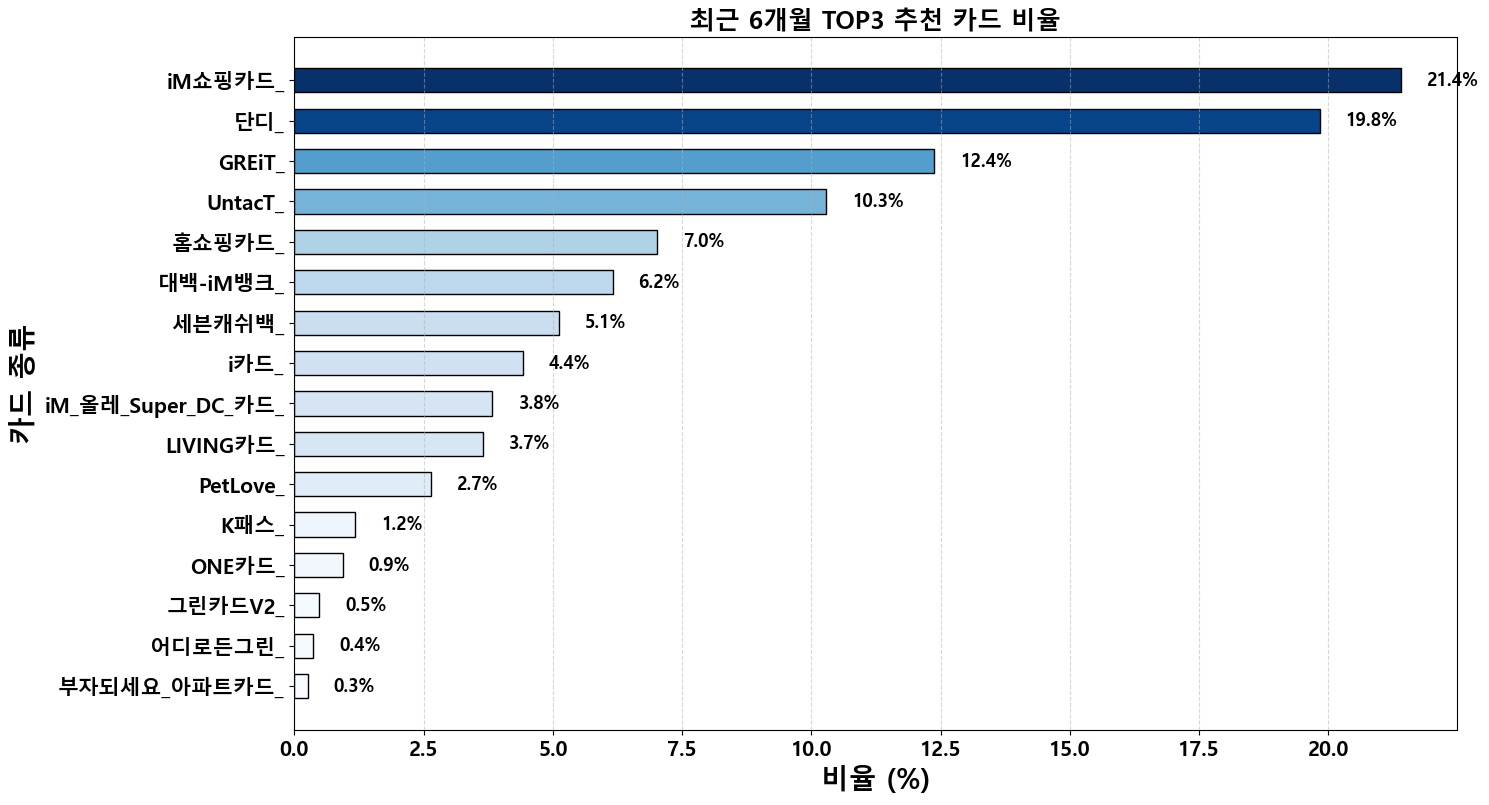

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib.cm as cm  # 컬러맵 적용

# 데이터 불러오기 (예제: CSV 파일이 있다고 가정)
df = pd.read_csv("고객혜택금액_sample1_final_ver5.csv")  # 실제 데이터 파일명으로 변경할 것

# 제외할 컬럼 리스트 (스카이실버, 스카이골드)
exclude_cards = ["스카이실버_1개월혜택", "스카이실버_3개월혜택", "스카이실버_6개월혜택", "스카이실버_12개월혜택",
                 "스카이골드_1개월혜택", "스카이골드_3개월혜택", "스카이골드_6개월혜택", "스카이골드_12개월혜택"]

# 사용자 입력: 분석할 기간 설정 (1, 3, 6, 12 중 선택)
n_months = 6
period_str = f"{n_months}개월혜택"

# `최근n개월혜택` 또는 `n개월혜택`이 포함된 컬럼을 필터링
selected_columns = [col for col in df.columns if (re.search(rf"(최근{n_months}개월혜택|{period_str})$", col) and col not in exclude_cards)]

# 고객별 TOP3 카드 찾기
top3_cards = df[["고객ID"] + selected_columns].set_index("고객ID")
top3_cards = top3_cards.apply(lambda row: row.nlargest(3).index.tolist(), axis=1)  # 각 행에서 상위 3개 컬럼 가져오기

# 리스트를 1차원으로 풀어 카드별 추천 횟수 세기
top3_flattened = [card for sublist in top3_cards for card in sublist]
card_counts = pd.Series(top3_flattened).value_counts()

# 카드별 추천 비율 계산
total_recommendations = len(top3_flattened)
card_ratios = (card_counts / total_recommendations) * 100  # 퍼센트 변환

# y축에서 "최근3개월혜택" 또는 "3개월혜택" 텍스트 제거 (카드 이름만 남김)
sorted_indices = card_ratios.sort_values(ascending=False).index 
sorted_card_ratios = card_ratios[sorted_indices]  # 정렬된 비율
sorted_card_labels = [re.sub(rf"(최근{n_months}개월혜택|{period_str})$", "", card) for card in sorted_indices]  # 정렬된 카드명

# **그라데이션 컬러 적용 (비율이 높을수록 더 진한 블루)**
cmap = cm.Blues  # 블루 계열의 컬러맵 선택
normalize = plt.Normalize(min(sorted_card_ratios), max(sorted_card_ratios))  # 정규화 (최소~최대)
colors = [cmap(normalize(value)) for value in sorted_card_ratios]  # 비율을 기반으로 색상 매핑

# **📌 플롯 설정**
plt.figure(figsize=(15, 9))
bars = plt.barh(sorted_card_labels[::-1], sorted_card_ratios[::-1], color=colors[::-1], edgecolor="black", height=0.6)  # 색상 적용

# **폰트 크기 조정**
plt.xlabel("비율 (%)", fontsize=20, fontweight="bold")  # x축 폰트 크기 증가
plt.ylabel("카드 종류", fontsize=20, fontweight="bold")  # y축 폰트 크기 증가
plt.title(f"최근 {n_months}개월 TOP3 추천 카드 비율", fontsize=18, fontweight="bold")  # 제목 크기 증가

# **x축 눈금 포맷 조정 (소수점 1자리까지만 표시)**
plt.xticks(fontsize=15, fontweight = "bold")
plt.yticks(fontsize=15, fontweight = "bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)  # x축 보조선 줄임

# **막대 끝에 퍼센트 값 추가 (막대 끝에 숫자 표시)**
for bar, value in zip(bars, sorted_card_ratios[::-1]):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f"{value:.1f}%", 
             va='center', fontsize=13, fontweight="bold")

# **컬러바 추가 (색상 범례)**
sm = cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="vertical")
cbar.set_label("추천 비율 (%)", fontsize=12, fontweight="bold")

# 그래프 표시
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# 파일 읽기
file_path = "고객별 소비TOP5업종_월별총승인금액_sample1.csv"
df = pd.read_csv(file_path)

df.columns

Index(['고객ID', 'n1_TOP1_가맹점업종명', 'n1_TOP2_가맹점업종명', 'n1_TOP3_가맹점업종명',
       'n1_TOP4_가맹점업종명', 'n1_TOP5_가맹점업종명', 'n1_TOP1_소비비율', 'n1_TOP2_소비비율',
       'n1_TOP3_소비비율', 'n1_TOP4_소비비율', 'n1_TOP5_소비비율', 'n3_TOP1_가맹점업종명',
       'n3_TOP2_가맹점업종명', 'n3_TOP3_가맹점업종명', 'n3_TOP4_가맹점업종명', 'n3_TOP5_가맹점업종명',
       'n3_TOP1_소비비율', 'n3_TOP2_소비비율', 'n3_TOP3_소비비율', 'n3_TOP4_소비비율',
       'n3_TOP5_소비비율', 'n6_TOP1_가맹점업종명', 'n6_TOP2_가맹점업종명', 'n6_TOP3_가맹점업종명',
       'n6_TOP4_가맹점업종명', 'n6_TOP5_가맹점업종명', 'n6_TOP1_소비비율', 'n6_TOP2_소비비율',
       'n6_TOP3_소비비율', 'n6_TOP4_소비비율', 'n6_TOP5_소비비율', 'n12_TOP1_가맹점업종명',
       'n12_TOP2_가맹점업종명', 'n12_TOP3_가맹점업종명', 'n12_TOP4_가맹점업종명',
       'n12_TOP5_가맹점업종명', 'n12_TOP1_소비비율', 'n12_TOP2_소비비율', 'n12_TOP3_소비비율',
       'n12_TOP4_소비비율', 'n12_TOP5_소비비율', '월별총승인금액_2023_01', '월별총승인금액_2023_02',
       '월별총승인금액_2023_03', '월별총승인금액_2023_04', '월별총승인금액_2023_05',
       '월별총승인금액_2023_06', '월별총승인금액_2023_07', '월별총승인금액_2023_08',
       '월별총승인금액_2023_09', '월별총승인금액_2023_10', '월별총승인금액_2023_

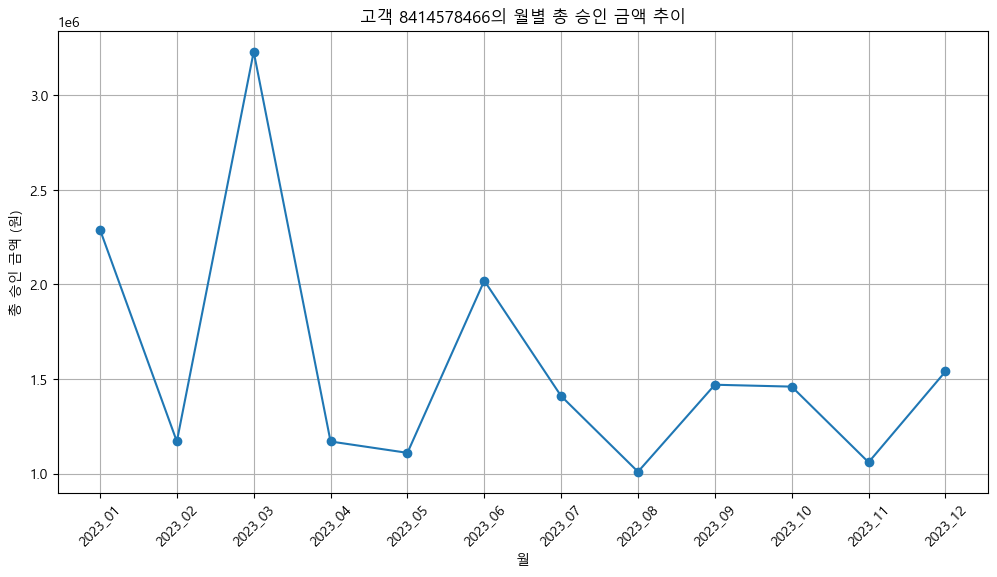

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# 파일 읽기
file_path = "고객별 소비TOP5업종_월별총승인금액_sample1.csv"
df = pd.read_csv(file_path)

# 고객 ID 리스트 가져오기
customer_ids = df['고객ID'].unique()

# 랜덤으로 한 명의 고객 선택
random_customer_id = random.choice(customer_ids)

# 해당 고객의 데이터 필터링
customer_data = df[df['고객ID'] == random_customer_id]

# 월별 총 승인 금액 관련 컬럼 추출
monthly_columns = [col for col in df.columns if '월별총승인금액' in col]
customer_monthly_data = customer_data[monthly_columns].T  # 전치하여 가로로 변환

# 컬럼 이름을 월 정보로 변경
customer_monthly_data.index = [col.replace('월별총승인금액_', '') for col in monthly_columns]

# 플롯 생성
plt.figure(figsize=(12, 6))
plt.plot(customer_monthly_data.index, customer_monthly_data.values, marker='o', linestyle='-')
plt.xlabel('월')
plt.ylabel('총 승인 금액 (원)')
plt.title(f'고객 {random_customer_id}의 월별 총 승인 금액 추이')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


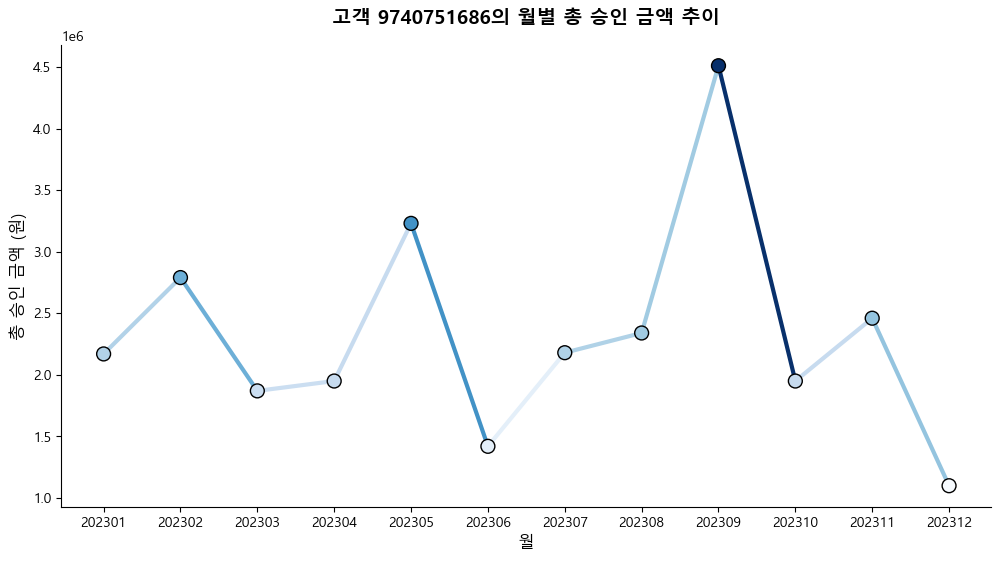

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import matplotlib.colors as mcolors
from scipy.interpolate import CubicSpline

# 고객 ID 리스트에서 랜덤 선택
customer_ids = df['고객ID'].unique()
random_customer_id = random.choice(customer_ids)

# 선택한 고객의 데이터 필터링
customer_data = df[df['고객ID'] == random_customer_id]

# 월별 총 승인 금액 컬럼 선택
monthly_columns = [col for col in df.columns if '월별총승인금액' in col]
customer_monthly_data = customer_data[monthly_columns].T  # 전치

# 인덱스를 월 정보로 변환
customer_monthly_data.index = [col.replace('월별총승인금액_', '') for col in monthly_columns]

# x, y 데이터 준비
months = np.array(customer_monthly_data.index.astype(int))  # 월 (숫자로 변환)
amounts = np.array(customer_monthly_data.values.flatten())  # 총 승인 금액

# 색상 맵핑을 위한 정규화 (진하기 조절)
norm = mcolors.Normalize(vmin=amounts.min(), vmax=amounts.max())
cmap = plt.cm.Blues  # 블루 계열 컬러맵 사용

# 매끄러운 곡선 보간
spline = CubicSpline(months, amounts)
x_smooth = np.linspace(months.min(), months.max(), 300)
y_smooth = spline(x_smooth)

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')

# 점과 선을 블루 그라데이션으로 표현 (총 승인 금액에 따라 진하기 조절)
for i in range(len(months) - 1):
    ax.plot(
        [months[i], months[i + 1]], [amounts[i], amounts[i + 1]],
        color=cmap(norm(amounts[i])), linewidth=3
    )

# 점 그리기 (한 색상 내에서 진하기 변화 적용)
ax.scatter(months, amounts, c=amounts, cmap=cmap, edgecolors='black', s=100, zorder=3)

# 타이틀 및 라벨 설정
ax.set_title(f'고객 {random_customer_id}의 월별 총 승인 금액 추이', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('월', fontsize=12)
ax.set_ylabel('총 승인 금액 (원)', fontsize=12)
ax.set_xticks(months)
ax.set_xticklabels(months, fontsize=10)

# 격자 제거 및 테두리 조정
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 컬러바 제거 (한 색상만 사용)
plt.show()
